In [1]:
%matplotlib inline
import matplotlib.style as style

import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

import scqubits as scq
import qutip as qt

from PulseSequence import PulseSequence
from QSwitch import QSwitch

style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
scq.settings.PROGRESSBAR_DISABLED = True

In [2]:
hbar = 1
h = hbar*2*np.pi
qe = 1

# Unit conversions
MHz = 10.0**(-3)
GHz = 1.0
kHz = 10.0**(-6)
us = 10.0**3
ns = 1.0

In [3]:
# q_in, q_switch, q_out1, q_out2
# EJs = [21, 20, 22, 21.5]
# ECs = [0.25, 0.35, 0.35, 0.28]
# gs = [0.1, 0.1, 0.1] # g12, g23, g24
EJs = [22, 21, 24, 23]
ECs = [0.25, 0.4, 0.28, 0.35]
gs = [0.15, 0.12, 0.1] # g12, g23, g24
cutoffs = [4, 5, 4, 4]
isCavity = [False, False, False, False]

qram = QSwitch(
    EJs=EJs,
    ECs=ECs,
    gs=gs,
    cutoffs=cutoffs,
    isCavity=isCavity,
)

qubit_freqs = qram.qubit_freqs
alphas = qram.alphas
print(qubit_freqs[0], qubit_freqs[1], qubit_freqs[2], qubit_freqs[3])
print(alphas[0], alphas[1], alphas[2], alphas[3])

6.372742057696335 7.77498011533865 7.040177663718682 7.657605339924338
-0.27581343076221465 -0.4576807972507133 -0.30938459812576546 -0.39344418225938504


In [4]:
# MAKE SURE DRESSED STATES ARE MAPPED CORRECTLY, AT LEAST FOR <= n EXCITATIONS

# qram.check_state_mapping(n=3)

In [6]:
seq = PulseSequence(start_time=0)
qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.17)
qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.01, t_rise=1) # switch with pulse 2 to avoid driving ggeg<->geeg!
qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.08)
qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.17)
qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.01)

# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12) # repeat of pulse 0
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.18)

# seq.wait(50)

# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.18)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12) # repeat of pulse 0
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12)


# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.03)
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.06)

# seq.wait(50)

# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.06)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.03)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)

	new overlap 0.9320232507919033 wd 55.38645387222959
	new overlap 0.96679355030283 wd 55.33645387222959
	new overlap 0.9897916957142578 wd 55.356453872229594
	new overlap 0.9898847606644732 wd 55.35445387222959
updated wd from 8.815027914096586 to 8.809934955917646
	new overlap 0.9992988305307374 wd 49.272204857471216
updated wd from 7.841914960103041 to 7.841914960103041
	new overlap 0.9817911173495771 wd 51.208240558568555
	new overlap 0.9817911173495771 wd 51.208240558568555
	new overlap 0.9896540627257224 wd 51.18824055856855
	new overlap 0.9897076426310938 wd 51.18624055856855
updated wd from 8.150044611935066 to 8.146543203187044
	new overlap 0.9320232507919033 wd 55.38645387222959
	new overlap 0.96679355030283 wd 55.33645387222959
	new overlap 0.9897916957142578 wd 55.356453872229594
	new overlap 0.9898847606644732 wd 55.35445387222959
updated wd from 8.815027914096586 to 8.809934955917646
	new overlap 0.9981144269740256 wd 47.51267741598356
updated wd from 7.561877470284444 to 

[8.809934955917646, 7.841914960103041, 8.146543203187044, 8.809934955917646, 7.561877470284444] (GHz)
[53.85915467403013, 57.61196416340801, 26.492232496925382, 53.85915467403013, 60.625138230436896] (ns)
total pulse length 252.44764423883055 ns


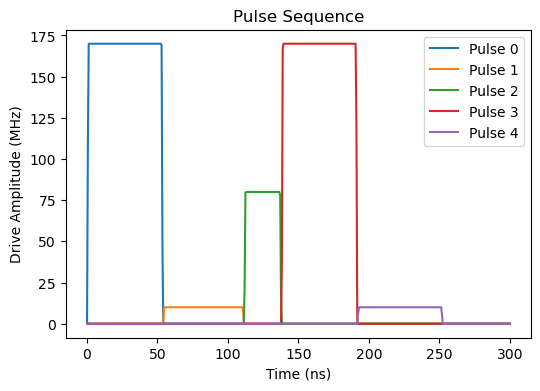

In [10]:
# times = np.linspace(0, 650, 200)
# times = np.linspace(0, 1450, 400)
times = np.linspace(0, 300, 500)
# times = np.linspace(0, 10, 100)

envelope_seq = seq.get_envelope_seq()
print(seq.get_pulse_freqs(), '(GHz)')
print(seq.get_pulse_lengths(), '(ns)')
print('total pulse length', sum(seq.get_pulse_lengths()), 'ns')
for i in range(len(envelope_seq)):
    plt.plot(times, [envelope_seq[i](t)/MHz for t in times], label=f'Pulse {i}')
plt.xlabel('Time (ns)')
plt.ylabel('Drive Amplitude (MHz)')
plt.title('Pulse Sequence')
plt.legend()
plt.show()

In [8]:
# incl_dissipation = True
incl_dissipation = False

T1 = 60e3 # ns
T2 = 30e3 # ?

# T1 = 10e3

c_ops = [
    np.sqrt(1/T1)*qram.a,
    np.sqrt(1/T1)*qram.b,
    np.sqrt(1/T1)*qram.c,
    np.sqrt(1/T1)*qram.d,
]

In [11]:
# psi0_name = 'eggg'
# psi0_name = 'gfgg'
# psi0_name = 'eegg'
# psi0_name = 'ggeg'
# psi0_name = 'ggge'

# psi0 = qram.state(psi0_name)
psi0 = np.sqrt(1/2) * qram.state('eggg') + np.sqrt(1/2) * qram.state('eegg') # QRAM start

# print(seq.get_pulse_str())

if incl_dissipation:
    full_result = qt.mcsolve(qram.H_solver_str(seq), psi0, times, c_ops, progress_bar=True, options=qt.Options(nsteps=10000))
    result = np.sum(full_result.states, axis=0)/full_result.ntraj
else:
    # result = qt.mesolve(qram.H_solver(seq), psi0, times, progress_bar=True, options=qt.Options(nsteps=10000)).states
    result = qt.mesolve(qram.H_solver_str(seq), psi0, times, progress_bar=True, options=qt.Options(nsteps=12000)).states

10.0%. Run time:   5.94s. Est. time left: 00:00:00:53
20.0%. Run time:  12.31s. Est. time left: 00:00:00:49
30.0%. Run time:  18.50s. Est. time left: 00:00:00:43
40.0%. Run time:  24.33s. Est. time left: 00:00:00:36
50.0%. Run time:  30.31s. Est. time left: 00:00:00:30
60.0%. Run time:  36.53s. Est. time left: 00:00:00:24
70.0%. Run time:  42.47s. Est. time left: 00:00:00:18
80.0%. Run time:  48.29s. Est. time left: 00:00:00:12
90.0%. Run time:  54.13s. Est. time left: 00:00:00:06
Total run time:  59.84s


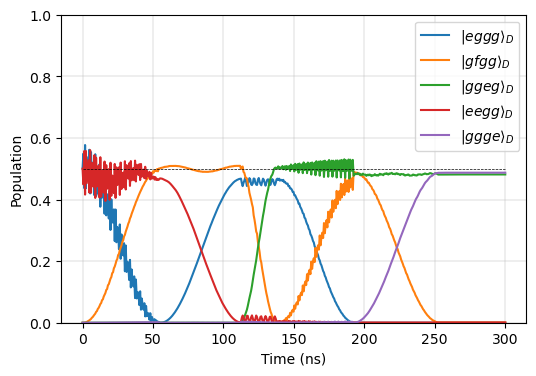

In [12]:
eggg = qram.state('eggg')
gfgg = qram.state('gfgg')
ggeg = qram.state('ggeg')
eegg = qram.state('eegg')
ggge = qram.state('ggge')

prob_eggg = [np.abs(eggg.overlap(result[t]))**2 for t in range(len(times))]
prob_gfgg = [np.abs(gfgg.overlap(result[t]))**2 for t in range(len(times))]
prob_ggeg = [np.abs(ggeg.overlap(result[t]))**2 for t in range(len(times))]
prob_eegg = [np.abs(eegg.overlap(result[t]))**2 for t in range(len(times))]
prob_ggge = [np.abs(ggge.overlap(result[t]))**2 for t in range(len(times))]

plt.plot(times, prob_eggg, label=r'$|eggg\rangle_D$')
plt.plot(times, prob_gfgg, label=r'$|gfgg\rangle_D$')
plt.plot(times, prob_ggeg, label=r'$|ggeg\rangle_D$')
plt.plot(times, prob_eegg, label=r'$|eegg\rangle_D$')
plt.plot(times, prob_ggge, label=r'$|ggge\rangle_D$')

# plt.plot(times, [np.abs(state('geeg').overlap(result[t]))**2 for t in range(len(times))], 'k--', label=r'$|geeg\rangle_D$')
# plt.plot(times, [np.abs(state('efgg').overlap(result[t]))**2 for t in range(len(times))], 'k-.', label=r'$|efgg\rangle_D$')

# for i1 in range(cutoffs[0]):
#     for i2 in range(cutoffs[1]):
#         for i3 in range(cutoffs[2]):
#             for i4 in range(cutoffs[3]):
#                 # print(qram.levels_nums_to_name([i1, i2, i3, i4]))
#                 plt.plot(times, 
#                          [np.abs(qram.state([i1, i2, i3, i4]).overlap(result[t]))**2 for t in range(len(times))],
#                          label='qram.level_nums_to_name[i1, i2, i3, i4]')

plt.plot(times, [0.5]*len(times), 'k--', linewidth=0.5)
plt.legend()
plt.ylim(0, 1)
# plt.xlim(750, 1000)
plt.xlabel('Time (ns)')
plt.ylabel('Population')
# plt.title(r'$\psi_0=|$'+psi0_name+r'$\rangle$')
plt.grid(linewidth=0.3)
plt.show()

In [ ]:
T = 150 # ns

sum_psi = 0
T = np.argmin(np.abs(times-T))
for i1 in range(cutoffs[0]):
    for i2 in range(cutoffs[1]):
        for i3 in range(cutoffs[2]):
            for i4 in range(cutoffs[3]):
                sum_psi += np.abs(qram.state([i1, i2, i3, i4]).overlap(result[T]))**2
print('Sum probabilities:', sum_psi)
print("Non-zero levels:")
for i1 in range(cutoffs[0]):
    for i2 in range(cutoffs[1]):
        for i3 in range(cutoffs[2]):
            for i4 in range(cutoffs[3]):
                prob = np.abs(qram.state([i1, i2, i3, i4]).overlap(result[T]))**2
                if prob > 0.01: print(qram.level_nums_to_name([i1, i2, i3, i4]), prob)

Sum probabilities: 1.0009055184799174
Non-zero levels:
gggf 0.052648135060221715
ggeg 0.46898222610519885
gfgg 0.2514214183506704
gfeg 0.014185450899532324
eggg 0.17765282519623987


In [ ]:
print('want', qram.get_wd('eggg', 'eegg')/2/np.pi)
print('resonant to', qram.get_wd('ggeg', 'geeg')/2/np.pi)
print('2 photon transition to', qram.get_base_wd('eggg', 'efgg')/2/np.pi)

TypeError: get_wd() missing 1 required positional argument: 'amp'

In [ ]:
print('want', qram.get_base_wd('gfgg', 'ggeg')/2/np.pi)
print(qram.get_base_wd('eegg', 'eege')/2/np.pi)

want 6.790158176784276
-6.801440393632177
